In [1]:
import requests
import os

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    if os.path.exists('./data/'+filename):
        print(filename + ' exists')
    else:
        print("Downloading ", filename)
        url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
        print("Get from ", url)
        content = requests.get(url)
        with open("./data/"+filename, 'wb') as f:
            for chunk in content.iter_content(chunk_size=1024):
                if chunk:
                    f.write(chunk)

Get from  https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/oecd_bli_2015.csv
Get from  https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/gdp_per_capita.csv


In [2]:
import  matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

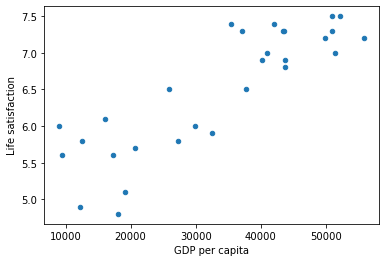

[[5.96242338]]


In [4]:
oecd_bli = pd.read_csv("./data/oecd_bli_2015.csv", thousands =',')
gdp_per_capita = pd.read_csv("./data/gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()
model = sklearn.linear_model.LinearRegression()
model.fit(x, y)
X_new = [[22587]]
print(model.predict(X_new))